# Relic Denisty for $\chi\chi\to h_2 h_2$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

%matplotlib inline
import matplotlib.pyplot as plt 

In [50]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [10]:
# Read the file with the good DM points
xd2 = pd.read_csv('DM2.csv')
del[xd2['Unnamed: 0']]

In [3]:
#Sum
xd2['BRS'] = xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3+xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3\
+xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3+xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3+xd2.BRxx2e1Nu1\
+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3+xd2.BRx1x1h1h1+xd2.BRx1x1h2h2+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww\
+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww  

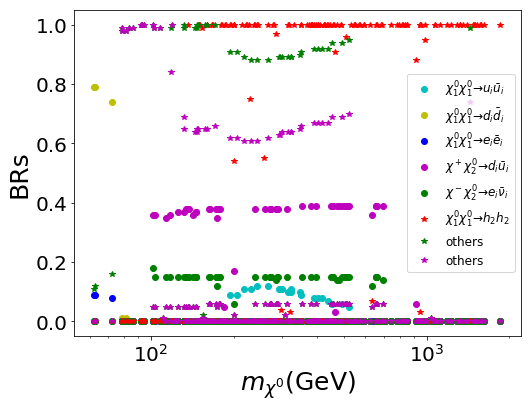

In [11]:
plt.figure(figsize=(8,6))
plt.semilogx(xd2.mChi1, (xd2.BRx1x1u1U1+xd2.BRx1x1u2U2+xd2.BRx1x1u3U3)/100.,'co',label=r'$\chi_1^0\chi_1^0\to u_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1d1D1+xd2.BRx1x1d2D2+xd2.BRx1x1d3D3)/100.,'yo',label=r'$\chi_1^0\chi_1^0\to d_i\bar{d}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1e1E1+xd2.BRx1x1e2E2+xd2.BRx1x1e3E3)/100.,'bo',label=r'$\chi_1^0\chi_1^0\to e_i\bar{e}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2d1U1+xd2.BRxx2d2U2+xd2.BRxx2d3U3)/100.,'mo',label=r'$\chi^+\chi_2^0\to d_i\bar{u}_i$')
plt.semilogx(xd2.mChi1, (xd2.BRxx2e1Nu1+xd2.BRxx2e2Nu2+xd2.BRxx2e3Nu3)/100.,'go',label=r'$\chi^-\chi_2^0\to e_i\bar{\nu}_i$')

plt.semilogx(xd2.mChi1, xd2.BRx1x1h2h2/100.,'r*',label=r'$\chi_1^0\chi_1^0\to h_2h_2$')
plt.semilogx(xd2.mChi1, (xd2.BRx1x1h1h1+xd2.BRx1x1h1h2+xd2.BRx1x1gg+xd2.BRx1x1ww+xd2.BRx1x1ZZ+xd2.BRxxww+xd2.BRx2x2ww)/100.,'g*',label=r'others')
plt.semilogx(xd2.mChi1, (xd2.BRxxww+xd2.BRx2x2ww+xd2.BRx1x1ww+xd2.BRx1x1ZZ)/100.,'m*',label=r'others')
#plt.semilogx(xd2.mChi1, xd2.BRS/100.,'k*',label=r'$\Sigma$')
plt.legend(prop={'size':12},loc='best')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'BRs',size=25)
plt.show()

In [5]:
h2 = xd2[np.logical_and(xd2.BRx1x1h2h2 >90., xd2.mChi1>xd2.mh2)]

h2 = h2.reset_index()
del[h2['index']]

In [6]:
print(xd2.shape[0], h2.shape[0])

284 100


# P-wave $\langle \sigma v\rangle$

\begin{equation}
\sigma v_r \approx \dfrac{h_c^4 (Z^H_{11})^4\sqrt{1-\mu^2}(9-8\mu^2+2\mu^4) }{192 \pi\, m_{\chi}^2 (2-\mu^2)^4} \color{red}{v_r^2} = b \color{red}{v_r^2} \to 
\langle\sigma v_r\rangle \approx \dfrac{h_c^4 (Z^H_{11})^4\sqrt{1-\mu^2}(9-8\mu^2+2\mu^4) }{192 \pi\, m_{\chi}^2 (2-\mu^2)^4} \color{red}{\dfrac{6}{x_f} }
\end{equation}

\begin{equation}
\mu = \dfrac{m_{h2}}{m_{\chi_1^0}}
\end{equation}

Conversion factor:
$3\times 10^{-26} cm^2/s \approx 2.541 \times 10^{-9} GeV^{-2}$

http://www.saha.ac.in/theory/palashbaran.pal/conv.html

In [73]:
6.58/(1.98**3)

0.8476768501255798

In [74]:
3*0.847

2.541

In [75]:
def sigmav(hc,ZH,u,m,xf):
    conver = 3.*10**(-26)/(2.541*10**(-9))
    siv = hc**4*ZH**4*np.sqrt(1.-u**2)*(9.-8.*u**2+2.*u**4)/(192.*np.pi*m**2*(2.-u**2)**4)*(6./xf)*conver
    return siv

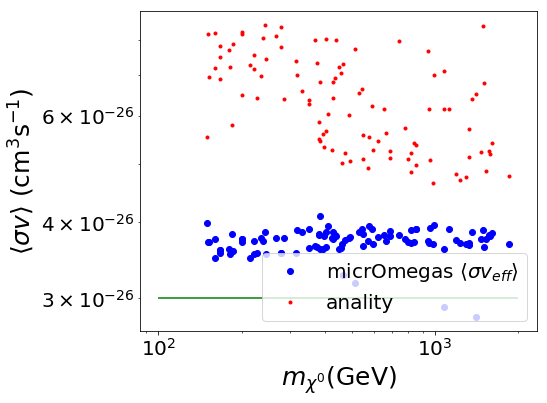

In [81]:
#Add to the DataFrame
h2['sv_fr_ana'] = sigmav(h2.YRC,h2.ZH11,h2.mh2/h2.mChi1,h2.mChi1,h2.Xf)

plt.figure(figsize=(8,6))

plt.loglog(h2.mChi1 , h2.vsigmaeff, 'bo',label=r'micrOmegas $\langle\sigma v_{eff}\rangle$')
plt.loglog(h2.mChi1 , h2.sv_fr_ana, 'r.',label=r'anality')

plt.hlines(3.e-26,1e2,2e3, 'g')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend()

plt.tight_layout()
plt.show()

Ok. Near to $3\times 10^{-26}$ WIMP miracle

# Relic Density $\Omega h^2$

\begin{equation}
\Omega h^2 = \dfrac{0.876\times 10^{-10}x_f}{\sqrt{g^{*}}}\dfrac{1}{\langle \sigma v_r\rangle}\to
\dfrac{0.876\times 10^{-10}x_f}{\sqrt{g^{*}}}\dfrac{1}{\left(a+\dfrac{3b}{x_f}+\cdots\right)}
\end{equation}

Conversion factor:
$3\times 10^{-26} cm^2/s \approx 2.54 \times 10^{-9} GeV^{-2}$

Mplanck $= 1.22091 \times 10^{19}$ GeV  (micrOmegas)

In [82]:
1.07/1.22091

0.8763954755059752

In [103]:
conver = 3.*10**(-26)/(2.541*10**(-9))

h2['Omega_ana'] = 2.*0.876*1.0e-10*h2.Xf/np.sqrt(90.)*1./(h2.sv_fr_ana/conver)

h2['Omega_anaeff'] = 2.*0.876*1.e-10*h2.Xf/np.sqrt(90.)*1./(h2.vsigmaeff/conver)

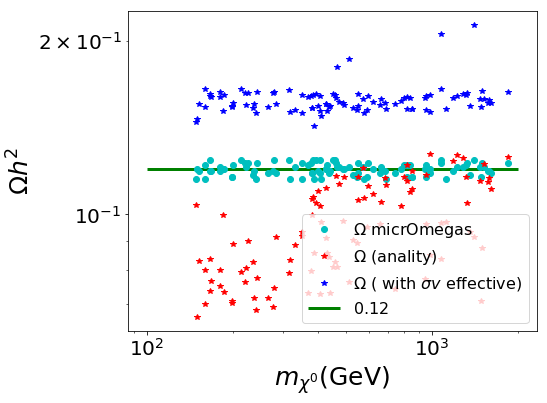

In [104]:
plt.figure(figsize=(8,6))

plt.hlines(0.12, 1e2, 2e3, 'g',lw=3,label=r'$0.12$')
plt.loglog(h2.mChi1, h2.Omega, 'co',label=r'$\Omega$ micrOmegas')
plt.loglog(h2.mChi1, h2.Omega_ana, 'r*',label=r'$\Omega$ (anality)')
plt.loglog(h2.mChi1, h2.Omega_anaeff, 'b*',label=r'$\Omega$ ( with $\sigma v$ effective)')

plt.legend(prop={'size':16},loc='lower right')
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
#plt.ylim(0.04, 0.2)

plt.tight_layout()
#plt.savefig('plots/xxtoh2h2-OMEGA.pdf')
plt.show()

In [96]:
h2.columns

Index(['MDF', 'MS12', 'MS22', 'LamS1H', 'LamS2H', 'LamSPH', 'LamS', 'LamSP',
       'vS', 'YRD', 'YRC', 'mh1', 'mh2', 'mv3', 'mv2', 'mv1', 'mS1', 'mS2',
       'mCha', 'mChi1', 'mChi2', 'XV11', 'XV12', 'XV21', 'XV22', 'XU11',
       'XU12', 'XU21', 'XU22', 'vevSM', 'Omega', 'PSI', 'PSD', 'NSI', 'NSD',
       'T', 'S', 'U', 'mueg', 'taumug', 'sv', 'ZH11', 'ZH12', 'ZH21', 'ZH22',
       'BRh1gg', 'BRh2gg', 'BRx1x1u1U1', 'BRx1x1u2U2', 'BRx1x1u3U3',
       'BRx1x1d1D1', 'BRx1x1d2D2', 'BRx1x1d3D3', 'BRx1x1e1E1', 'BRx1x1e2E2',
       'BRx1x1e3E3', 'BRxx2d1U1', 'BRxx2d2U2', 'BRxx2d3U3', 'BRxx2e1Nu1',
       'BRxx2e2Nu2', 'BRxx2e3Nu3', 'BRx1x1h1h1', 'BRx1x1h2h2', 'BRx1x1h1h2',
       'BRx1x1gg', 'BRx1x1ww', 'BRx1x1ZZ', 'BRxxww', 'BRx2x2ww', 'Xf',
       'vsigmaeff', 'BRS', 'sv_fr_ana', 'Omega_ana', 'Omega_anaeff'],
      dtype='object')

In [99]:
h2[['mh1','mh2','mChi1','mChi2','mCha','mS1','mS2','Xf']]

mh1          mh2        mChi1        mChi2        mCha  \
0   124.861005   174.167281   199.735482  1679.444000  1679.44400   
1   124.861776   150.087491   180.038336   929.009050   929.00888   
2   124.861902   144.424791   160.189384  5163.278830  5163.21440   
3   124.861762   144.982485   166.879319  8606.169950  8606.16850   
4   124.859347   147.766529   149.389445   269.044763   269.04476   
5   124.861295   129.942904   150.585393  3041.993590  3041.99320   
6   124.860911   248.778238   265.869355  1348.638850  1348.63770   
7   124.861936   321.307714   530.105443   766.899761   766.89161   
8   124.861847  1058.261500  1502.090280  6066.225070  6066.22500   
9   124.861600   531.167800  1565.827870  9340.178200  9340.17820   
10  124.832560   267.069311   548.367700  9307.935490  9307.93520   
11  124.853305   155.018434   424.327229   585.462270   585.46227   
12  124.841245   206.656890   685.449811  1339.714400  1339.71440   
13  124.861720   202.075092  1073.536590  3333.706330  3333.70050   
14  124.861879   180.334209   383.975989  3490.688700  3490.09900   
15  124.858752   758.646445   945.093817  6691.143010  6691.14300   
16  124.859638   788.886889  1357.048780  3919.238300  3919.23830   
17  124.861846   291.783764   849.542062  5646.298200  5646.29820   
18  124.852727   211.566997   317.490239  7514.054000  7514.05400   
19  124.825797   199.788608   814.567174  9682.212620  9682.21220   
20  124.861942   618.215332  1610.406190  5422.367000  5422.36700   
21  124.854138   182.486693   185.029859  4453.189600  4453.18960   
22  124.861929   205.235406   404.882599  9179.673700  9179.67120   
23  124.861853   529.962990  1468.733900  3973.624410  3973.62430   
24  124.850187   260.546531   623.028046  9630.393290  9630.39310   
25  124.861756   196.589639   391.844847   503.777196   503.76350   
26  124.861481   657.209393  1074.593880  3892.371000  3892.37100   
27  124.861858   242.492506   594.473531  3662.478500  3662.47850   
28  124.861921   561.070751   949.837999  4365.434100  4365.43410   
29  124.861824   135.666381   167.659565  3210.195300  3210.19530   
..         ...          ...          ...          ...         ...   
70  124.821085   215.186434   222.270306   609.325983   609.31406   
71  124.854964   173.789731   214.616953  2309.360170  2309.35520   
72  124.851012   197.241393   349.698856  2312.929120  2312.92350   
73  124.835965   218.011869   350.416243  1578.348900  1578.34890   
74  124.861595   333.990426   544.758176  2945.854100  2945.85410   
75  124.861353   150.398506   852.575338  1868.793250  1868.76240   
76  124.860834   166.263627   471.850305  2158.752600  2158.75260   
77  124.838409   313.547972   661.762417  1116.602500  1116.60250   
78  124.861935   220.032123   241.823188   544.959400   544.93517   
79  124.860326   153.786379   380.010900  1348.660780  1348.65450   
80  124.854124   264.077385   488.093414  2984.468900  2984.46890   
81  124.860411   344.882522   447.990304   793.348074   793.34774   
82  124.861892   141.575932   180.931926   333.265133   333.26256   
83  124.860278   149.575996   570.949336   840.454479   840.43727   
84  124.818011   160.748355   166.339577  2054.282400  2054.28240   
85  124.861692   242.189264   463.444191   494.154100   494.15410   
86  124.861943   383.212288   403.490548  1511.710770  1511.54430   
87  124.861631   169.327912   186.336343   364.490478   364.49046   
88  124.861914   256.061900   277.443415   318.575620   318.57562   
89  124.861069   586.439401  1118.955090  1435.348900  1435.34890   
90  124.861842   147.577982   397.039740  2944.938650  2944.91020   
91  124.861562   322.972798   329.749771  2273.605330  2273.60530   
92  124.861862   234.118557   818.663155  1167.812100  1167.81210   
93  124.861536   321.083208   593.375049  2614.676190  2614.58970   
94  124.861664   195.690175   200.106319  1273.521880  1273.35410   
95  124.845666   217.550748   575.580196  1874.713470  1874.70930   
96  124.8

In [100]:
np.sqrt(6./28)

0.46291004988627571